### Go to Google Drive -> Click "Shared with me" (left nativation bar) -> Find the folder "AI_Proj" -> Right Click the folder -> Click "Add shortcut to Drive" -> Select "My Drive" and Click "ADD SHORTCUT"

https://drive.google.com/drive/folders/1BLC443oy5nGChvr-QzrbgQ6_6tgVaGCi?usp=sharing

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import torchvision.ops.boxes as bops
import torch
from IPython.display import Image


In [2]:
def extract_result(file_name,object_name):
  '''
  This function is responsible for extracting the data related to the bounding box prediction.
  Yolo Darknet gives the result in a file with class name detected and its corresponding bounding box.
  From this file we extract the required bounding boxes and pass in the form of numpy array.
   
  ''' 
  f = open(file_name, "r")
  flines=np.array([])
  for x in f:
      flines=np.append(flines,x)
  frame_n=np.array([])
  for i in range(0,len(flines)):
        if str(flines[i]).find('.jpg')>-1:
  #         print(flines[i+1])  # Uncomment this line to see the particular frames which got dropped while object detection
          if str(flines[i+1]).find(f'{object_name}:')==-1:
              frame_n=np.append(frame_n,[0.0,0.0,0.0,0.0])
              # print(flines[i])
          else:
  #             print(flines[i+1])
              result_lx = flines[i+1].find('left_')
          #     print(i[result_lx+9:result_lx+12])
              result_ty=flines[i+1].find('top_y:')
          #     print(i[result_ty+8:result_ty+11])
              result_wd=flines[i+1].find('width:  ')
          #     print(i[result_wd+8:result_wd+11])
              result_h=flines[i+1].find('height:  ')
          #     print(i[result_h+9:result_h+12])
              frame_n=np.append(frame_n,[flines[i+1][result_lx+9:result_lx+12],flines[i+1][result_ty+8:result_ty+11],flines[i+1][result_wd+8:result_wd+11],flines[i+1][result_h+9:result_h+12]])  

  frame_n=frame_n.reshape(-1,4).astype(np.float)
  return frame_n              

In [3]:
def calc_iou(result_frame,gtruth):
  '''
  This function is used for calculating the IOU values between the predicted bounding boxes and ground truth 
  We will first calculate the bounding boxes first and last coordinates by adding the width and height, then the IOU will be calculated  
  '''
  predsbbox=pd.DataFrame(result_frame)
  iou=np.array([])
  for i in range(len(gtruth)): #Calculating IOU for all the frames
      tgnd_truth=torch.tensor([gtruth.iloc[i,:]])
      tpredsbbox=torch.tensor([predsbbox.iloc[i,:]])

      x1=tgnd_truth[0][0]
      y1=tgnd_truth[0][1]
      x2=x1+tgnd_truth[0][2]
      y2=y1+tgnd_truth[0][3]

      xt1=tpredsbbox[0][0]
      yt1=tpredsbbox[0][1]
      xt2=xt1+tpredsbbox[0][2]
      yt2=yt1+tpredsbbox[0][3]

      box1=torch.tensor([[x1,y1,x2,y2]])
      box2=torch.tensor([[xt1,yt1,xt2,yt2]])

      # iou = bops.box_iou(box1, box2)
      iou=np.append(iou,bops.box_iou(box1, box2))
  return iou

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
os.chdir("/content/drive/MyDrive/AI_Proj")
os.chdir("darknet")

Matrix Dataset


*************************Results************************
IOU = 0.7934885202261309

Number of dropped frames = 6


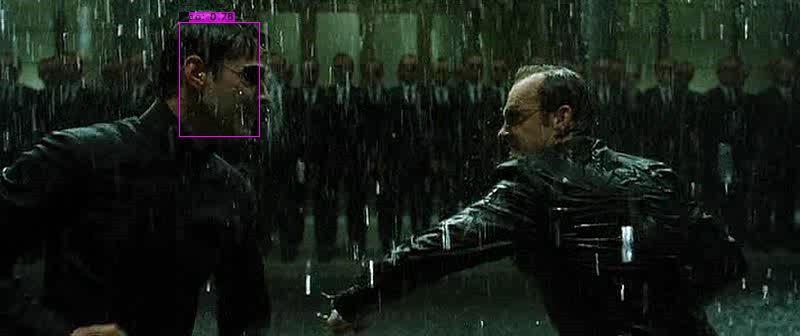

In [7]:
# performing inference using the weights from the trained model through darknet framework
!chmod 777 darknet 
os.system("./darknet detector test cfg/Matrix/ts_data.data cfg/yolov3_ts_test.cfg weights/matrix/yolov3_ts_train_2000.weights -ext_output < matrix.txt -dont_show -save_labels >matrix_result.txt")
gnd_truth=pd.read_csv("../Sequences/Matrix/groundtruth_rect.txt",sep=",",names=[0,1,2,3]) # importing ground truth to compare the result
frames=extract_result("matrix_result.txt","Neo")
cal=calc_iou(frames,gnd_truth)
print()
print("*************************Results************************")
print(f"IOU = {np.mean([i for i in cal if i>0])}")
print()
print(f"Number of dropped frames = {np.sum(cal==0)}")
Image('predictions.jpg')

IronMan Dataset


*************************Results************************
IOU = 0.771146933094038

Number of dropped frames = 17


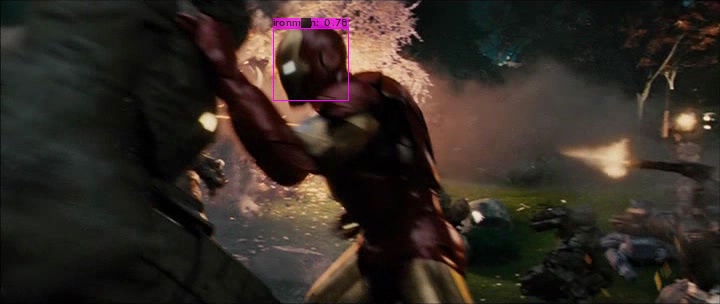

In [6]:
# performing inference using the weights from the trained model through darknet framework
!chmod 777 darknet
os.system("./darknet detector test cfg/ironman/ts_data.data cfg/yolov3_ts_test.cfg weights/ironman/yolov3_ts_train_final.weights -ext_output < ironman.txt -dont_show -save_labels >ironman_result.txt")

gnd_truth=pd.read_csv("../Sequences/Ironman/groundtruth_rect.txt",sep=",",names=[0,1,2,3]) # importing ground truth to compare the result
frames=extract_result("ironman_result.txt","ironman")
cal=calc_iou(frames,gnd_truth)
print()
print("*************************Results************************")
print(f"IOU = {np.mean([i for i in cal if i>0])}")
print()
print(f"Number of dropped frames = {np.sum(cal==0)}")
Image('predictions.jpg')

Shaking Dataset


*************************Results************************
IOU = 0.8710138683051868

Number of dropped frames = 6


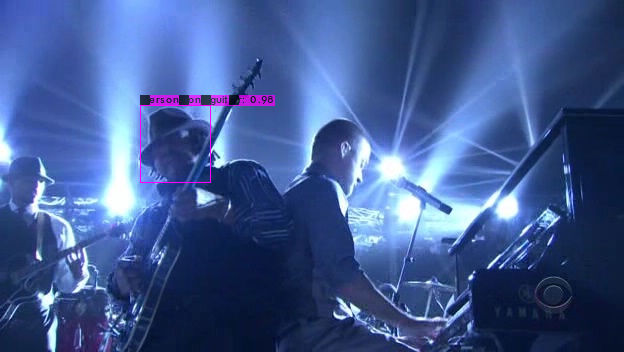

In [29]:
# performing inference using the weights from the trained model through darknet framework
!chmod 777 darknet
os.system("./darknet detector test cfg/shaking/ts_data.data cfg/yolov3_ts_test.cfg weights/shaking/yolov3_ts_train_2000.weights -ext_output < Shaking.txt -dont_show -save_labels >shaking_result.txt")

gnd_truth=pd.read_csv("../Sequences/Shaking/groundtruth_rect.txt",sep=",",names=[0,1,2,3]) # importing ground truth to compare the result
frames=extract_result("shaking_result.txt","Person_on_guitar")
cal=calc_iou(frames,gnd_truth)
print()
print("*************************Results************************")
print(f"IOU = {np.mean([i for i in cal if i>0])}")
print()
print(f"Number of dropped frames = {np.sum(cal==0)}")
Image('predictions.jpg')

Bird1 Dataset


*************************Results************************
IOU = 0.7031587955663351

Number of dropped frames = 135


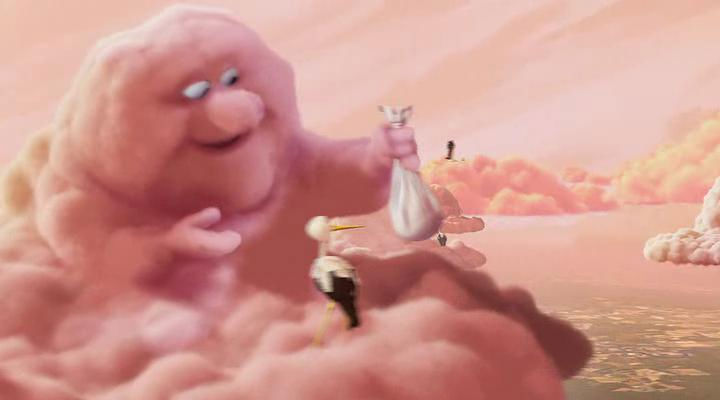

In [28]:
# performing inference using the weights from the trained model through darknet framework
!chmod 777 darknet
os.system("./darknet detector test cfg/bird1/ts_data.data cfg/yolov3_ts_test.cfg weights/bird1/yolov3_ts_train_2000.weights -ext_output < Bird1.txt -dont_show -save_labels >Bird1_result.txt")

gnd_truth=pd.read_csv("../Sequences/Bird1/groundtruth_rect.txt",sep=",",names=[0,1,2,3]) # importing ground truth to compare the result
frames=extract_result("Bird1_result.txt","bird")
cal=calc_iou(frames,gnd_truth)
print()
print("*************************Results************************")
print(f"IOU = {np.mean([i for i in cal if i>0])}")
print()
print(f"Number of dropped frames = {np.sum(cal==0)}")
Image('predictions.jpg')

Transformer Dataset


*************************Results************************
IOU = 0.8183706333013099

Number of dropped frames = 0


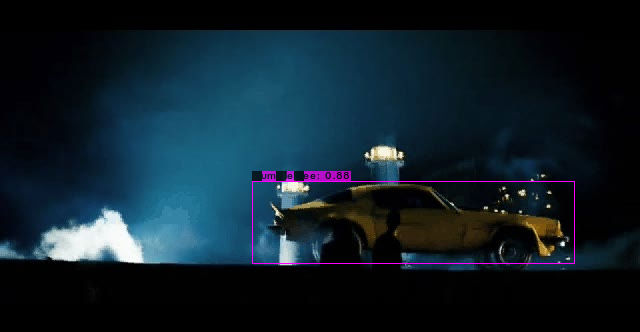

In [27]:
# performing inference using the weights from the trained model through darknet framework
!chmod 777 darknet
os.system("./darknet detector test cfg/Trans/ts_data.data cfg/yolov3_ts_test.cfg weights/trans/yolov3_ts_train_final.weights -ext_output < trans.txt -dont_show -save_labels >trans_result.txt")

gnd_truth=pd.read_csv("../Sequences/Trans/groundtruth_rect.txt",sep=",",names=[0,1,2,3]) # importing ground truth to compare the result
frames=extract_result("trans_result.txt","Bumblebee")
cal=calc_iou(frames,gnd_truth)
print()
print("*************************Results************************")
print(f"IOU = {np.mean([i for i in cal if i>0])}")
print()
print(f"Number of dropped frames = {np.sum(cal==0)}")
Image('predictions.jpg')